# Data exploration of CyTOF sets

In [36]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
from sklearn.metrics import f1_score
import os
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import KFold


## Sample of data

In [37]:
sample = pd.read_csv("../Data/PANORAMA/Samples/Samples01.csv", header=None)
markers = ['Ter119','CD45.2','Ly6G','IgD','CD11c','F480','CD3','NKp46','CD23',
            'CD34','CD115','CD19','120g8','CD8','Ly6C','CD4','CD11b','CD27','CD16_32',
            'SiglecF','Foxp3','B220','CD5','FceR1a','TCRgd','CCR7','Sca1','CD49b','cKit',
            'CD150','CD25','TCRb','CD43','CD64','CD138','CD103','IgM','CD44','MHCII']
sample.columns = markers
sample.head(10)

,Ter119,CD45.2,Ly6G,IgD,CD11c,F480,CD3,NKp46,CD23,CD34,...,CD150,CD25,TCRb,CD43,CD64,CD138,CD103,IgM,CD44,MHCII
0,-0.30416,1.31230,-0.286970,-0.20859,1.402700,1.20650,-0.213720,-0.054569,-0.239330,-0.282240,...,0.874740,-0.016584,-0.099003,5.720300,0.66856,-0.098138,-0.229340,-0.246720,3.34600,-0.050778
1,-0.33094,0.19375,-0.009644,-0.33023,-0.339830,1.32740,-0.321190,-0.294260,-0.215410,-0.292410,...,-0.304200,-0.318980,-0.239430,0.297110,0.43763,0.023776,-0.303940,0.202910,3.99780,0.344630
2,-0.30554,1.74500,1.051400,-0.27056,-0.143130,-0.30412,-0.199820,-0.261000,-0.253090,-0.341760,...,-0.228320,-0.315390,-0.238720,-0.250980,-0.33615,-0.189390,-0.137230,5.108300,0.39405,3.666300
3,-0.34303,2.01170,-0.172230,-0.33583,-0.342000,2.00310,-0.284280,-0.186040,0.300580,-0.290580,...,-0.263700,-0.222530,-0.266030,-0.155270,2.76790,-0.239380,-0.023883,-0.034218,4.48520,0.701710
4,-0.19893,1.81050,-0.300430,-0.32335,-0.342810,0.60875,-0.313480,0.570740,-0.244890,-0.096765,...,-0.296520,-0.136830,1.123000,3.555300,0.69628,0.102030,-0.016809,-0.264990,4.78600,0.606260
5,-0.21946,0.61753,-0.298550,-0.22917,-0.296820,1.09270,-0.257650,-0.335930,-0.295930,0.409980,...,-0.280840,0.278570,-0.332040,0.189010,2.29020,0.229340,-0.209560,0.376750,3.79260,0.669650
6,-0.28746,0.95229,0.018152,-0.31537,-0.139070,2.22740,-0.197400,-0.148140,-0.239470,0.717520,...,-0.302030,-0.242370,-0.294070,0.092166,0.21569,-0.320490,0.559120,-0.047981,3.18400,0.616270
7,-0.32242,0.90390,0.292450,0.67402,0.033029,1.97480,-0.331360,0.191630,-0.062204,1.518700,...,1.163300,-0.225190,-0.151240,4.113800,-0.12754,-0.099417,-0.270240,-0.315430,4.87170,0.935400
8,-0.26139,0.29810,0.075409,-0.32091,-0.216940,-0.20411,-0.336500,-0.282780,-0.213230,-0.292080,...,0.027988,-0.340940,-0.291220,3.314800,0.12707,0.298470,-0.266800,0.063750,3.55690,0.004834
9,-0.25832,0.70085,0.179340,-0.31544,-0.315110,0.53833,-0.027095,-0.302740,-0.218480,-0.152440,...,-0.159760,-0.320480,0.239730,0.043636,2.25280,0.507060,-0.307170,-0.180140,3.63510,-0.112150


In [38]:
#Declare variables for data acquisition from CSV results
labelfiles = os.listdir("../Data/PANORAMA/Labels/")
samplefiles = os.listdir("../Data/PANORAMA/Samples/")
labelfiles.sort()
samplefiles.sort()
F1list = []
Acclist = []
predictfiles = os.listdir("../Results/Predictions/PANORAMA LDA/CV-sample")
predictfiles.sort()
truedict = {}
preddict = {}

In [39]:
#Data acquisition from CSV results

for i in range(len(samplefiles)):
    #Calculate F1 & accuracy scores for each prediciton
    true = list(pd.read_csv("../Data/PANORAMA/Labels/" + labelfiles[i], header=None, engine='python').values.ravel())
    predicted = list(pd.read_csv("../Results/Predictions/PANORAMA LDA/CV-sample/" + predictfiles[i], header=None, engine='python').values.ravel())
    F1list.append(metrics.f1_score(truelabels, predictlabels, average=None, labels=list(set(truelabels.values.ravel()))))
    Acclist.append(metrics.accuracy_score(true, predicted))
    #Calculate counts of all original labels
    unique, counts = np.unique(true, return_counts=True)
    temp = dict(zip(unique, counts))
    for celltype in temp:
        try:
            truedict[celltype] += temp[celltype]
        except KeyError:
            truedict[celltype] = temp[celltype]
    #Calculate counts of all predicted labels
    unique, counts = np.unique(predicted, return_counts=True)
    temp = dict(zip(unique, counts))
    for celltype in temp:
        try:
            preddict[celltype] += temp[celltype]
        except KeyError:
            preddict[celltype] = temp[celltype]

## CV-sample stats

In [40]:
instancecount =0
for key in preddict:
    instancecount += truedict[key]
print('Number of cell predictions made: %i' % instancecount)
instancecount =0
for key in preddict:
    instancecount += truedict[key]
print('Original number of true labels: %i' % instancecount)

Number of cell predictions made: 514386
Original number of true labels: 514386


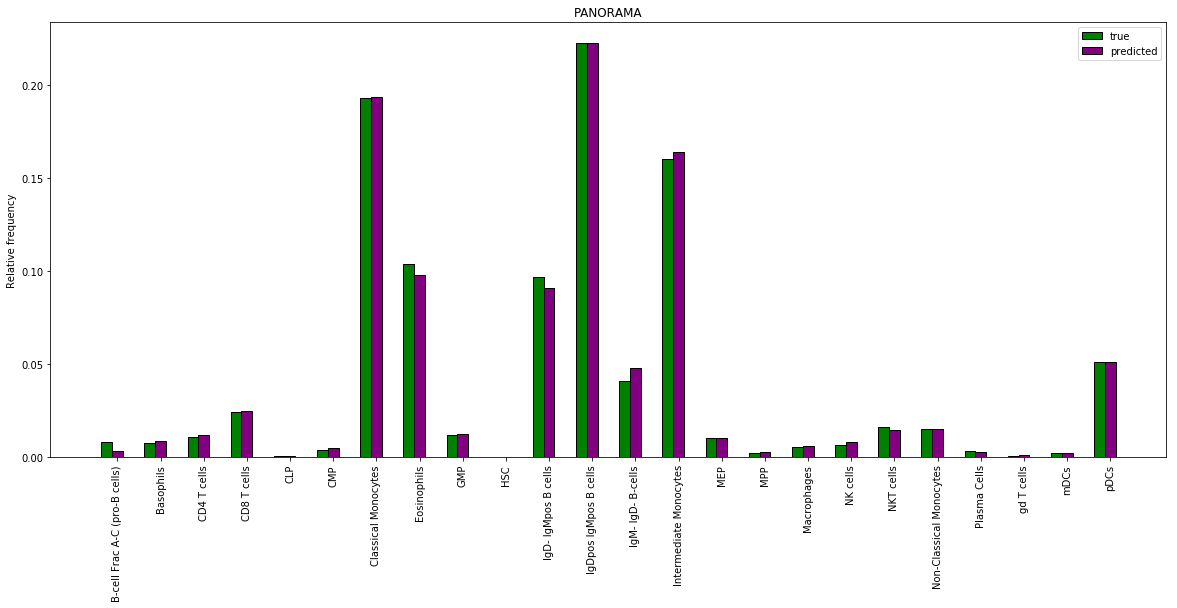

In [41]:
# set width of bars
barWidth = 0.25
plt.rcParams['figure.figsize'] = [20, 8]

# set height of bars
bars = [[dictionary[key] for key in dictionary] for dictionary in [truedict, preddict]]
for x in range(len(bars)):
    total = sum(bars[x])
    for y in range(len(bars[x])):
        bars[x][y] = bars[x][y] / total
#set bar x coords
r1 = np.arange(len(bars[0]))
r2 = r1 + 0.25
#plot bars & ticks
plt.bar(r1, bars[0], color='green', width=barWidth, edgecolor='black', label='true')
plt.bar(r2, bars[1], color='purple', width=barWidth, edgecolor='black', label='predicted')
plt.xticks([r + barWidth for r in range(len(truedict.keys()))], truedict.keys(), rotation='vertical')
plt.legend()
plt.title("PANORAMA")
plt.ylabel("Relative frequency")
plt.show()

In [42]:
F1median = np.median(F1list)
Accmean = np.mean(Acclist) * 100
Accstd = np.std(Acclist) * 100
print('PANORAMA CV-samples')
print('Accuracy mean: %s' % round(Accmean, 2))
print('Accuracy std: %s' % round(Accstd, 2))
print('F1 median: %s' % round(F1median, 2))

PANORAMA CV-samples
Accuracy mean: 96.99
Accuracy std: 0.34
F1 median: 0.93


Correct F1 median:

In [43]:
print("correct median F1")
np.median(np.sum(F1list, axis=0)/len(F1list))

correct median F1


0.9314967775590473

## CV-cells stats

In [44]:
#Load all labels for 5-cold CV performance
predictlabels = pd.DataFrame()
truelabels = pd.DataFrame()

for batch in range(1, 6):
    predictlabels = predictlabels.append(pd.read_csv("../Results/Predictions/PANORAMA LDA/CV-cells/" + 'predict_batch_' + str(batch) +'.csv',
                                          header=None, engine='python'))
for filename in labelfiles:
    truelabels = truelabels.append(pd.read_csv("../Data/PANORAMA/Labels/" + filename, header=None))



## Calculate accuracies and F1 scores for 5 fold

In [64]:
F1list  = []
Acclist = []

kfoldsplitter = KFold(n_splits=5)
for train, test in kfoldsplitter.split(predictlabels):
    true = truelabels.iloc[test].values.ravel()
    pred = predictlabels.iloc[test].values.ravel()
    F1list.append(metrics.f1_score(truelabels, predictlabels, average=None, labels=list(set(truelabels.values.ravel()))))
    Acclist.append(metrics.accuracy_score(true, pred))

In [65]:
F1median = np.median(F1list)
Accmean = np.mean(Acclist) * 100
Accstd = np.std(Acclist) * 100
print('PANORAMA CV-cells')
print('Accuracy mean: %s' % round(Accmean, 2))
print('Accuracy std: %s' % round(Accstd, 2))
print('F1 median: %s' % round(F1median, 2))

PANORAMA CV-cells
Accuracy mean: 97.14
Accuracy std: 0.21
F1 median: 0.93


In [66]:
print("correct median F1")
np.median(np.sum(F1list, axis=0)/len(F1list))

correct median F1


0.9314967775590473

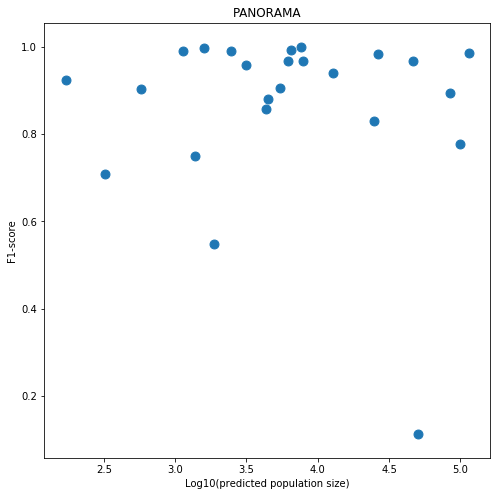

In [67]:
logplotdict = {}
plt.rcParams['figure.figsize'] = [8, 8]

for i, key in enumerate(preddict):
    logplotdict[key] = [(np.sum(F1list, axis=0)/5)[i], np.log10(preddict[key])]
x = [logplotdict[i][1] for i in logplotdict]
y = [logplotdict[i][0] for i in logplotdict]
plt.xlabel('Log10(predicted population size)')
plt.ylabel('F1-score')
plt.scatter(x, y, s=80)
plt.rc('axes', axisbelow=True)
plt.title("PANORAMA")
plt.show()